# Aula03

Roteiro:
* Manipulando Imagens
* Histograma
* Limiarização ou Thresholding
* Convolução
* Filtros da Média
* Filtros Erosão e Dilatação

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Comandos para configurar os parâmetros do matplotlib para o notebook inteiro!
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

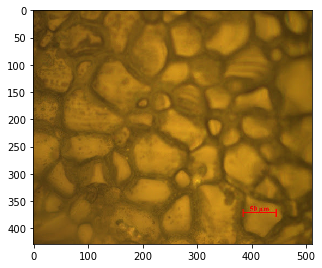

In [37]:
img_original = plt.imread('data/Alu b.jpg')
fig = plt.imshow(img_original)

### Manipulando imagens

In [4]:
#Abrindo Imagem
img_original = plt.imread('data/Alu b.jpg')

print(img_original.shape) #dimensões
    #(linhas, colunas, canais)
print("tipo de dado:", img_original.dtype)
print("uint8 = unsigned integer 8 bits")

print(img_original[1:10,1:10,0])
    #seleciono intervalo de pixeis [1,10], e apenas 1 canal de cor

(429, 512, 3)
tipo de dado: uint8
uint8 = unsigned integer 8 bits
[[81 80 79 78 78 77 75 79 76]
 [78 76 76 78 77 75 72 76 74]
 [83 82 81 80 80 78 76 75 74]
 [87 87 85 82 81 82 83 77 77]
 [90 89 87 84 82 82 84 80 80]
 [95 94 94 90 89 89 89 86 87]
 [95 92 92 93 94 89 87 89 89]
 [89 95 98 99 98 96 93 91 85]
 [87 94 98 99 98 95 91 91 85]]


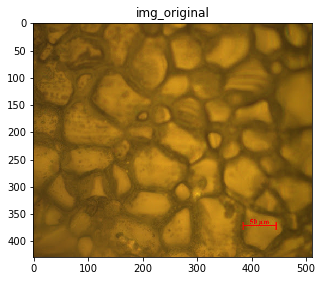

In [5]:
#Mostrando imagem
plt.figure(figsize=(5,5)) #tamanho do output(largura,altura)
plt.title("img_original") #título
fig = plt.imshow(img_original, "gray") #imagem e ucmap

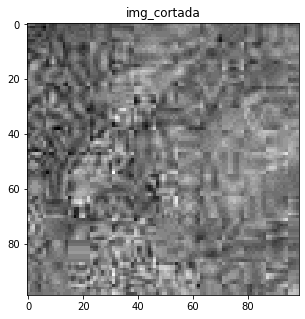

In [6]:
#Zoom
plt.figure(figsize=(5,5))
plt.title("img_cortada") #título
fig = plt.imshow(img_original[1:100,1:100,2], 'gray') #imagem e ucmap

In [7]:
#Conferindo Dimensões
print("Resolução:", img_original.dtype,"= cada pixel contém um valor de inteiro positivo, de 8 bits(256 intensidades)")
print("Dimensões: altura",img_original.shape[0],"; largura",img_original.shape[1],"; canais", img_original.shape[2])
print("Intensidade de cor mínima:",np.min(img_original[:,:,1]))
print("Intensidade de cor máxima:",np.max(img_original[:,:,1]))
    
#Extraindo dados
y,x = img_original.shape[:2]
c = 3 #Canais
q = 8 #bits de quantização

Resolução: uint8 = cada pixel contém um valor de inteiro positivo, de 8 bits(256 intensidades)
Dimensões: altura 429 ; largura 512 ; canais 3
Intensidade de cor mínima: 0
Intensidade de cor máxima: 191


old min 0.0
old max 191.0
new min 0
new max 255


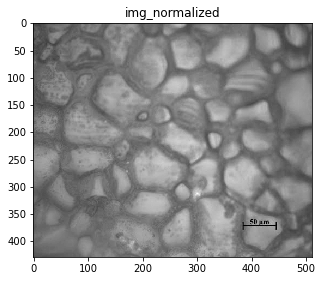

In [8]:
#Normalização de uma imagem
#Utilizando funções básicas

img = img_original[:,:,1] #Seleciono um canal

minn = float(np.min(img)) #Extraio valores máximo e mínimo
maxx = float(np.max(img)) 

print("old min", minn)
print("old max", maxx)

img_normalized = 255*(img-minn)/maxx 
img_normalized = np.uint8(img_normalized)

print("new min", np.min(img_normalized))
print("new max", np.max(img_normalized))

plt.figure(figsize=(5,5))
plt.title("img_normalized") #título
fig = plt.imshow(img_normalized, 'gray') #imagem e ucmap

## OpenCV

Documentação para versão 3.4.2:

https://docs.opencv.org/3.4.2/d4/d13/tutorial_py_filtering.html

(429, 512, 3)
(429, 512)


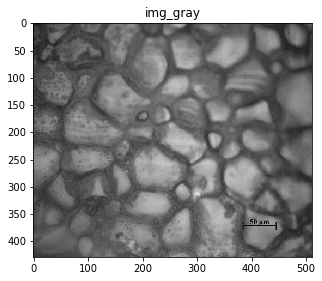

In [9]:
#Abrindo Imagem
img_original = plt.imread('data/Alu b.jpg')

#Conversão de uma imagem para outro sistema de cores
img_gray = cv2.cvtColor(img_original,cv2.COLOR_BGR2GRAY)

#img_gray = img_original[:,:,0]

plt.figure(figsize=(5,5)); plt.title("img_gray"); fig = plt.imshow(img_gray, 'gray')
print(img_original.shape)
print(img_gray.shape)

### Histograma

histograma.shape =  (256, 1)
soma do histograma = 219648
soma do histograma = [219648.]


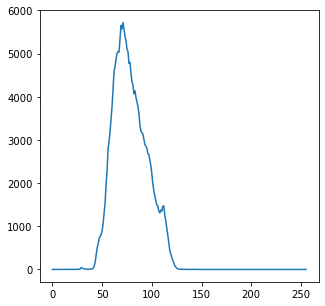

In [49]:
#Histograma
histograma = cv2.calcHist([img_gray],[0],None,[256],[0,256])

print("histograma.shape = ", histograma.shape)

x, y = img_gray.shape
print("soma do histograma =", x*y)
print("soma do histograma =", sum(histograma))

plt.plot(histograma)
plt.show()

### Limiarização ou Thresholding
Útil para a aplicação de muitas funções do Opencv

70.0


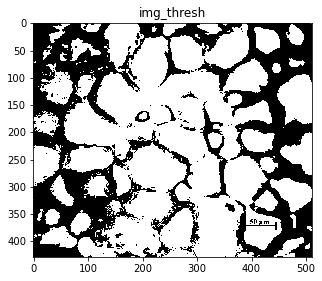

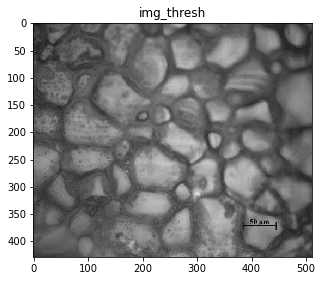

In [40]:
#Thresholding da imagem

threshold, img_thresh = cv2.threshold(img_gray, 70, 255, 0)

print(threshold)
plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')
plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_gray, 'gray')

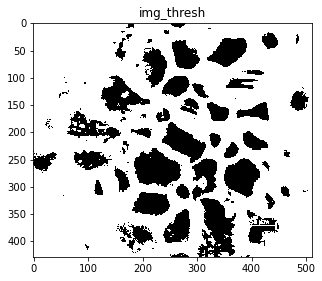

In [42]:
#Invertendo
threshold, img_thresh = cv2.threshold(img_gray, 90, 255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')

81.0


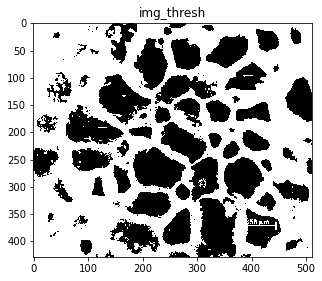

In [45]:
#Calculando ponto de corte ótimo
threshold, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

print(threshold)
plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')

81.0


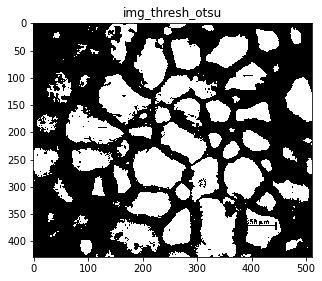

In [46]:
#Invertendo
threshold, img_thresh_otsu = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)

print(threshold)
plt.figure(figsize=(5,5)); plt.title("img_thresh_otsu"); fig = plt.imshow(img_thresh_otsu, 'gray')

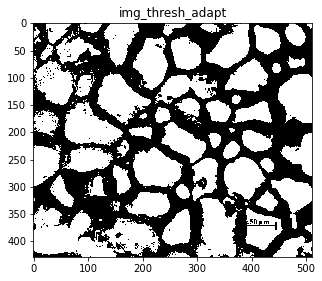

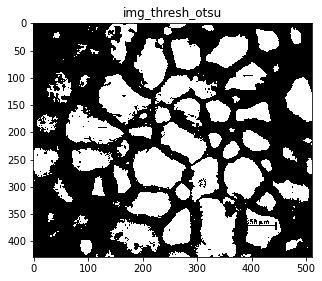

In [15]:
#Adaptivo
#http://homepages.inf.ed.ac.uk/rbf/HIPR2/adpthrsh.htm
img_thresh_adapt = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 3) 

plt.figure(figsize=(5,5)); plt.title("img_thresh_adapt"); fig = plt.imshow(img_thresh_adapt, 'gray')
plt.figure(figsize=(5,5)); plt.title("img_thresh_otsu"); fig = plt.imshow(img_thresh_otsu, 'gray')

### Equalização de Histograma
Útil para visualização da imagem

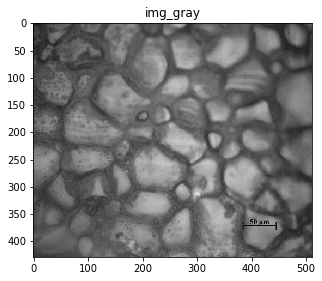

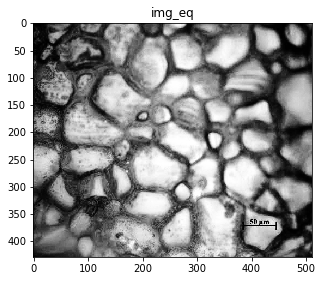

In [16]:
#Equalização de Histograma
img_eq = cv2.equalizeHist(img_gray)

plt.figure(figsize=(5,5)); plt.title("img_gray"); fig = plt.imshow(img_gray, 'gray')
plt.figure(figsize=(5,5)); plt.title("img_eq"); fig = plt.imshow(img_eq, 'gray')

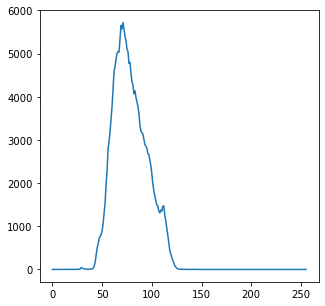

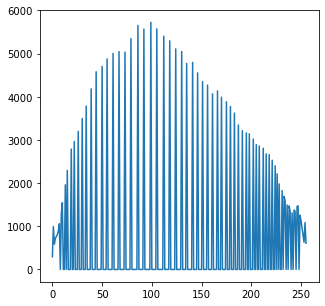

In [17]:
#Visualizaçao dos histogramas das imagens com e sem equalização
hist_original = cv2.calcHist([img_gray],[0],None,[256],[0,256])

hist_eq = cv2.calcHist([img_eq],[0],None,[256],[0,256])

plt.plot(hist_original)
plt.show()

plt.plot(hist_eq)
plt.show()

histograma.shape =  (256, 1)
soma do histograma = 219648
soma do histograma = [219648.]


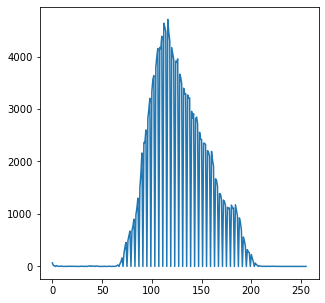

In [18]:
#Histograma da imagem normalizada manualmente na primeira parte da aula
histograma = cv2.calcHist([img_normalized],[0],None,[256],[0,256])

print("histograma.shape = ", histograma.shape)

x, y = img_normalized.shape
print("soma do histograma =", x*y)
print("soma do histograma =", sum(histograma))

plt.plot(histograma)
plt.show()

## Filtros e Convolução
https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
https://media4.giphy.com/media/i4NjAwytgIRDW/giphy.gif?cid=ecf05e47s5rlkiuve5rzfdxj7avifbf63vu34h5w1onuwwi5&rid=giphy.gif

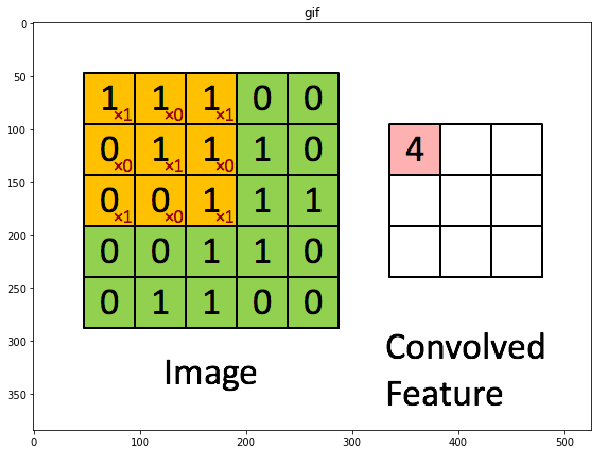

In [19]:
#Operação de Convolução

gif = plt.imread('data/convolution.gif')
plt.figure(figsize=(10,10)); plt.title("gif"); fig = plt.imshow(gif, 'gray')

In [20]:
#Kernel ou núcleo ou vizinhança
kernel = np.ones([3,3])
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [21]:
#Kernels prontos do Opencv
quadrado = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
cruz = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(cruz)
print(ellipse)

[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


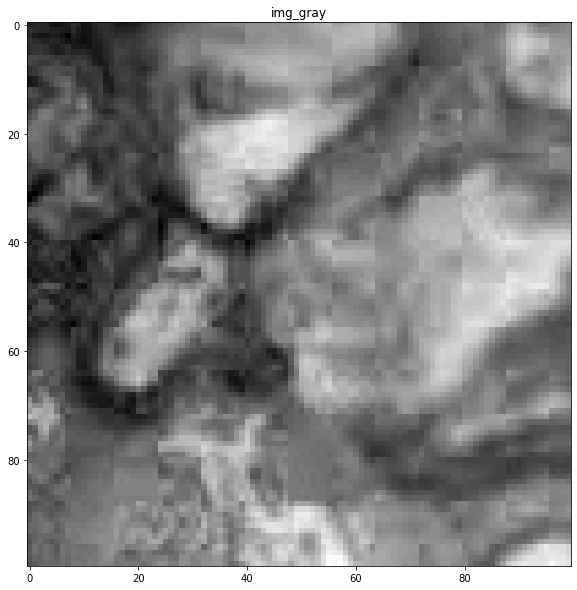

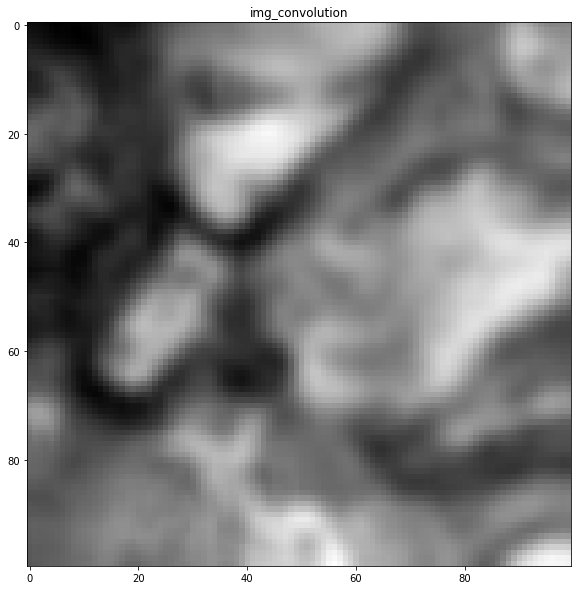

In [54]:
#Convolução
def convolution2(image, kernel):
    y,x = image.shape
    ky, kx = kernel.shape
    
    new = np.zeros([y,x])
    
    for i in range(y):
        for j in range(x):
            value = 0
            divisor = 0
            for ki in range(ky):
                for kj in range(kx):
                    n = i+ki-int(ky/2)
                    m = j+kj-int(kx/2)
                    if 0 <= n < y and 0 <= m < x:
                        divisor +=kernel[ki,kj]
                        value += image[n,m]*kernel[ki,kj]
            
            if divisor <= 0: divisor = 1
            new[i,j]=value/divisor

    return new.astype(np.float64)

kernel = np.ones([5,5])

print(kernel)
img_convolution = convolution2(img_gray[:100,:100], kernel)

plt.figure(figsize=(10,10)); plt.title("img_gray"); fig = plt.imshow(img_gray[:100,:100], 'gray')
plt.figure(figsize=(10,10)); plt.title("img_convolution"); fig = plt.imshow(img_convolution[:100,:100], 'gray')


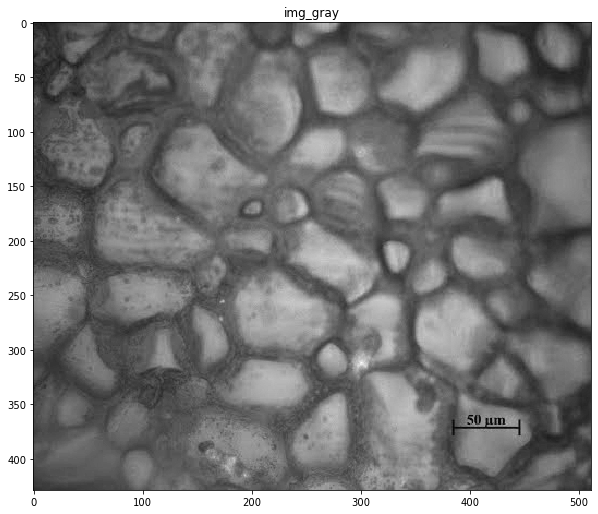

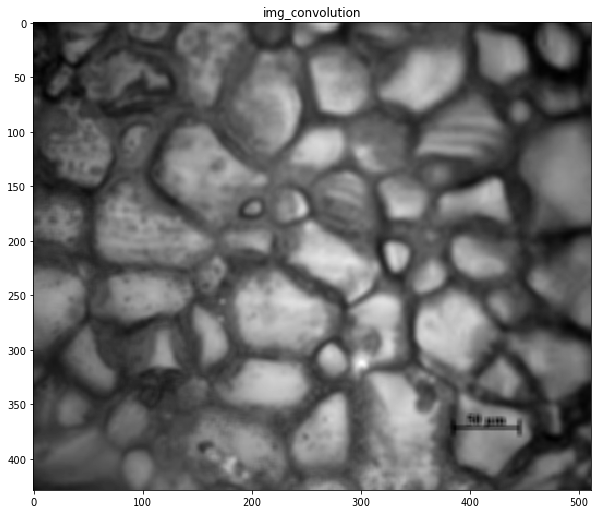

In [53]:
plt.figure(figsize=(10,10)); plt.title("img_gray"); fig = plt.imshow(img_gray, 'gray')
plt.figure(figsize=(10,10)); plt.title("img_convolution"); fig = plt.imshow(img_convolution, 'gray')

## Filtro da média
https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

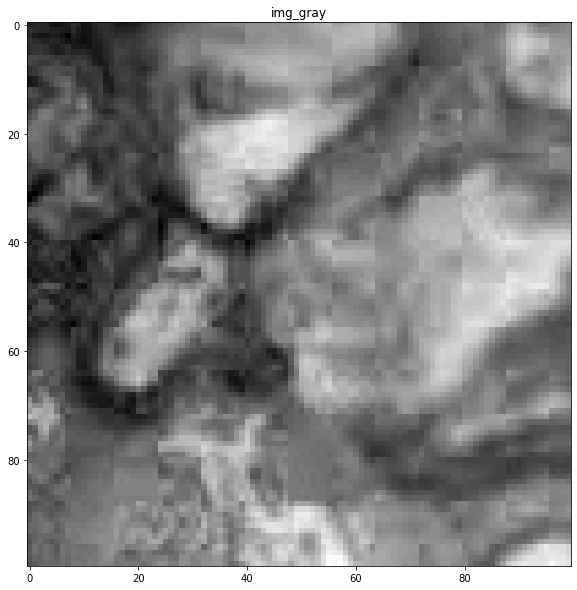

In [23]:
plt.figure(figsize=(10,10)); plt.title("img_gray"); fig = plt.imshow(img_gray[:100,:100], 'gray')

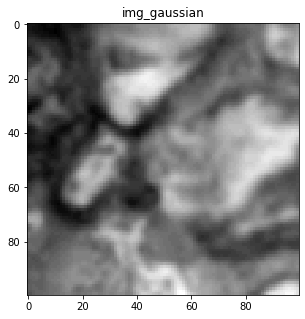

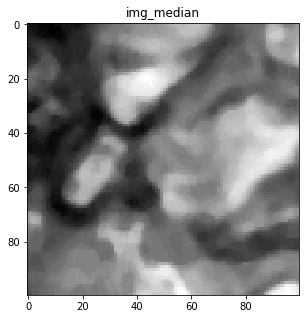

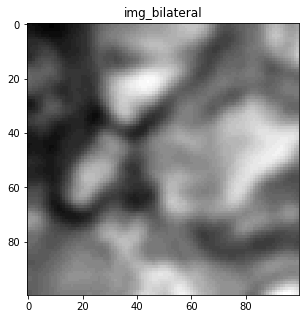

In [24]:
#Filtros Gaussiano e Mediana

img_gaussian = cv2.GaussianBlur(img_gray, (5, 5), 0)
img_median = cv2.medianBlur(img_gray,5)
img_bilateral = cv2.bilateralFilter(img_gray,9,75,75)

plt.figure(figsize=(5,5)); plt.title("img_gaussian"); fig = plt.imshow(img_gaussian[:100,:100], 'gray')
plt.figure(figsize=(5,5)); plt.title("img_median"); fig = plt.imshow(img_median[:100,:100], 'gray')
plt.figure(figsize=(5,5)); plt.title("img_bilateral"); fig = plt.imshow(img_bilateral[:100,:100], 'gray')

In [25]:
# Núcleos Gaussiandos

print(cv2.getGaussianKernel(5,.8))
print(cv2.getGaussianKernel(5,0))

[[0.02192964]
 [0.22851215]
 [0.49911642]
 [0.22851215]
 [0.02192964]]
[[0.0625]
 [0.25  ]
 [0.375 ]
 [0.25  ]
 [0.0625]]


## Filtros Erosão e Dilatação
https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

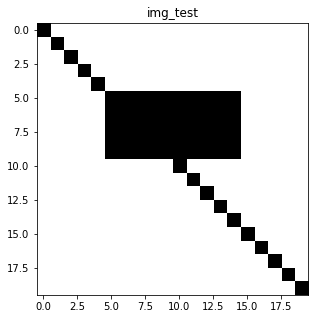

In [26]:
#Criando imagem de teste
img_test = np.ones([20,20])

for i in range(20):
    img_test[i,i] = 0
    
img_test[5:10,5:15] = 0

plt.figure(figsize=(5,5)); plt.title("img_test"); fig = plt.imshow(img_test, 'gray')

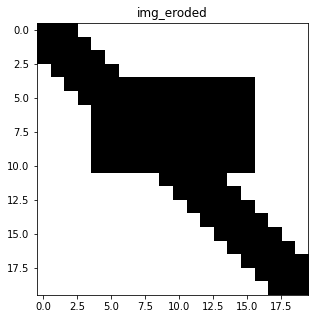

In [58]:
#Erosão na imagem teste
kernel = np.ones([3,3])
img_eroded = cv2.erode(img_test,kernel,iterations=1)
plt.figure(figsize=(5,5)); plt.title("img_eroded"); fig = plt.imshow(img_eroded, 'gray')

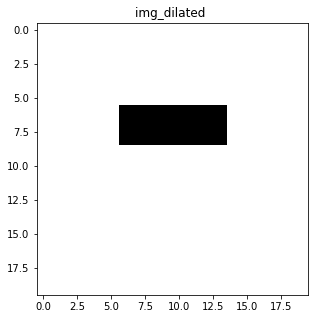

In [60]:
#Dilatação na imagem teste
img_dilated = cv2.dilate(img_test,kernel,iterations=1)
plt.figure(figsize=(5,5)); plt.title("img_dilated "); fig = plt.imshow(img_dilated , 'gray')

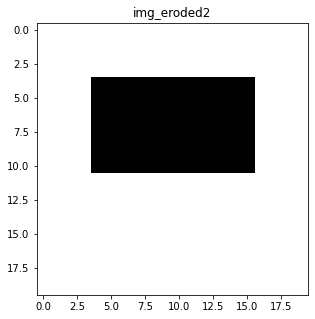

In [29]:
#Erosão na imagem dilatada
kernel = np.ones([3,3])
img_eroded2 = cv2.erode(img_dilated,kernel,iterations=2)
plt.figure(figsize=(5,5)); plt.title("img_eroded2"); fig = plt.imshow(img_eroded2, 'gray')

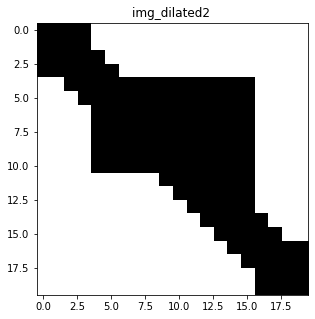

In [30]:
#Dilatação na imagem erodida
img_dilated2 = cv2.dilate(img_eroded,kernel,iterations=1)
plt.figure(figsize=(5,5)); plt.title("img_dilated2 "); fig = plt.imshow(img_dilated2, 'gray')

### Atividade
Aplicar erosão e/ou dilatação em alguma imagem de sua escolha (ou imagens da pasta do drive).

Aplique os filtros com diferentes tamanhos de kernel, e diferentes números de iterações para observar os resultados e obter uma noção.

Se resultar em algo interessante pode mostrar.

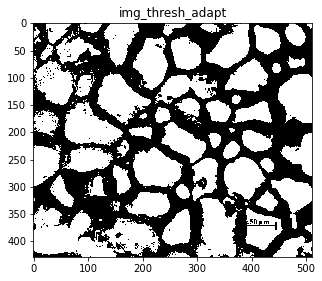

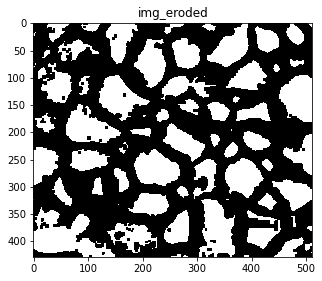

In [31]:
# Exemplo
img_original = plt.imread('data/Alu b.jpg')

img_gray = cv2.cvtColor(img_original,cv2.COLOR_BGR2GRAY)

img_thresh_adapt = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 3) 
plt.figure(figsize=(5,5)); plt.title("img_thresh_adapt"); fig = plt.imshow(img_thresh_adapt, 'gray')

img_eroded = cv2.erode(img_thresh_adapt,kernel,iterations=2)
plt.figure(figsize=(5,5)); plt.title("img_eroded"); fig = plt.imshow(img_eroded, 'gray')